In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('dataset.csv', usecols=['MONATSZAHL','AUSPRAEGUNG','JAHR','MONAT','WERT'])

In [3]:
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
0,Alkoholunfälle,insgesamt,2022,202201,NaN
1,Alkoholunfälle,insgesamt,2022,202202,NaN
2,Alkoholunfälle,insgesamt,2022,202203,NaN
3,Alkoholunfälle,insgesamt,2022,202204,NaN
4,Alkoholunfälle,insgesamt,2022,202205,NaN


In [4]:
df.shape

(2086, 5)

### Drop data after 2020

In [5]:
for x in df.index:
  if df.loc[x, "JAHR"] > 2020:
    df.drop(x, inplace = True)

In [6]:
df.shape

(1911, 5)

### check for missing values

In [7]:
df.isna().sum()

MONATSZAHL     0
AUSPRAEGUNG    0
JAHR           0
MONAT          0
WERT           0
dtype: int64

In [8]:
print(df['MONATSZAHL'].unique())
print(df['AUSPRAEGUNG'].unique())
print(df['JAHR'].unique())
print(df['MONAT'].unique())
#'Summe' in MONAT

['Alkoholunfälle' 'Fluchtunfälle' 'Verkehrsunfälle']
['insgesamt' 'Verletzte und Getötete' 'mit Personenschäden']
[2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2010 2009 2008 2007
 2006 2005 2004 2003 2002 2001 2000]
['Summe' '202001' '202002' '202003' '202004' '202005' '202006' '202007'
 '202008' '202009' '202010' '202011' '202012' '201901' '201902' '201903'
 '201904' '201905' '201906' '201907' '201908' '201909' '201910' '201911'
 '201912' '201801' '201802' '201803' '201804' '201805' '201806' '201807'
 '201808' '201809' '201810' '201811' '201812' '201701' '201702' '201703'
 '201704' '201705' '201706' '201707' '201708' '201709' '201710' '201711'
 '201712' '201601' '201602' '201603' '201604' '201605' '201606' '201607'
 '201608' '201609' '201610' '201611' '201612' '201501' '201502' '201503'
 '201504' '201505' '201506' '201507' '201508' '201509' '201510' '201511'
 '201512' '201401' '201402' '201403' '201404' '201405' '201406' '201407'
 '201408' '201409' '201410' '201411' '201412' '20

In [9]:
df['MONAT'].value_counts()

Summe     147
200505      7
201603      7
202003      7
202005      7
         ... 
201006      7
200501      7
201209      7
201610      7
200008      7
Name: MONAT, Length: 253, dtype: int64

## Generate plots

In [10]:
#sort it first to make sure the year is in ascending order
df.sort_values(by=['JAHR'], ascending=True, inplace=True)

In [16]:
def make_plot(df, Category):
    width = 0.5  # the width of the bars
    labels = df.loc[(df['MONATSZAHL']==Category) & (df['MONAT']=="Summe")]['JAHR'].unique()
    x = np.arange(len(labels))  # the label locations
    
    fig, ax = plt.subplots()
    
    if 'insgesamt' in df.loc[(df['MONATSZAHL']==Category)]['AUSPRAEGUNG'].unique():
        insgesamt = df.loc[(df['MONATSZAHL']==Category) & (df['AUSPRAEGUNG']=='insgesamt') & (df['MONAT']=="Summe")]['WERT']
        rects1 = ax.bar(x - width/2, insgesamt, width, label='insgesamt')
        ax.bar_label(rects1, padding=3)

    if 'Verletzte und Getötete' in df.loc[(df['MONATSZAHL']==Category)]['AUSPRAEGUNG'].unique():
        verletzte = df.loc[(df['MONATSZAHL']==Category) & (df['AUSPRAEGUNG']=='Verletzte und Getötete') & (df['MONAT']=="Summe")]['WERT']
        rects2 = ax.bar(x, verletzte, width, label='Verletzte und Getötete')
        ax.bar_label(rects2, padding=3)
    
    #'mit Personenschäden' exists only 'Verkehrsunfälle' category 
    if 'mit Personenschäden' in df.loc[(df['MONATSZAHL']==Category)]['AUSPRAEGUNG'].unique():
        mit = df.loc[(df['MONATSZAHL']==Category) & (df['AUSPRAEGUNG']=='mit Personenschäden') & (df['MONAT']=="Summe")]['WERT']
        rects3 = ax.bar(x + width/2, mit, width, label='mit Personenschäden')
        ax.bar_label(rects3, padding=4)
        

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('WERT')
    ax.set_title(Category)
    ax.set_xticks(x, labels)
    ax.legend()   
    
    fig.tight_layout()
    plt.xticks(rotation=45)
    
    params = {
    'figure.figsize': '15, 8'
    }
    plt.rcParams.update(params)

    plt.show()

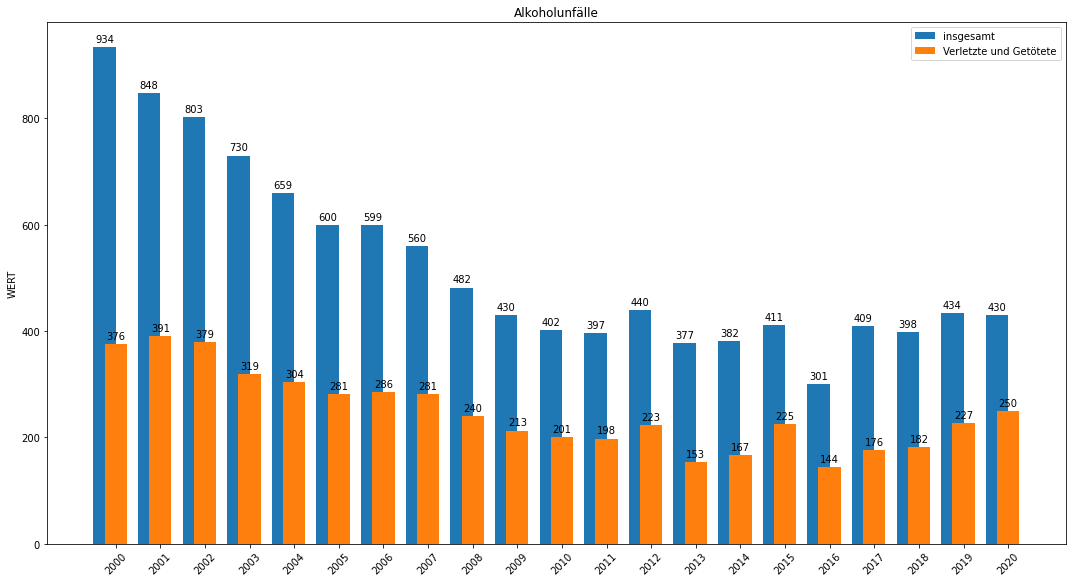

In [14]:
make_plot(df, "Alkoholunfälle")

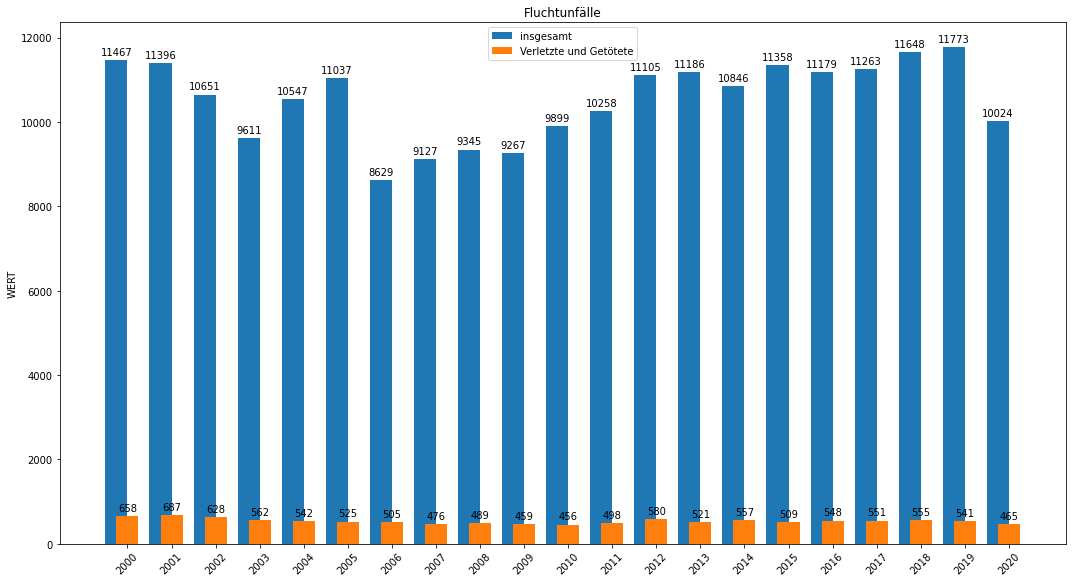

In [19]:
make_plot(df, "Fluchtunfälle")

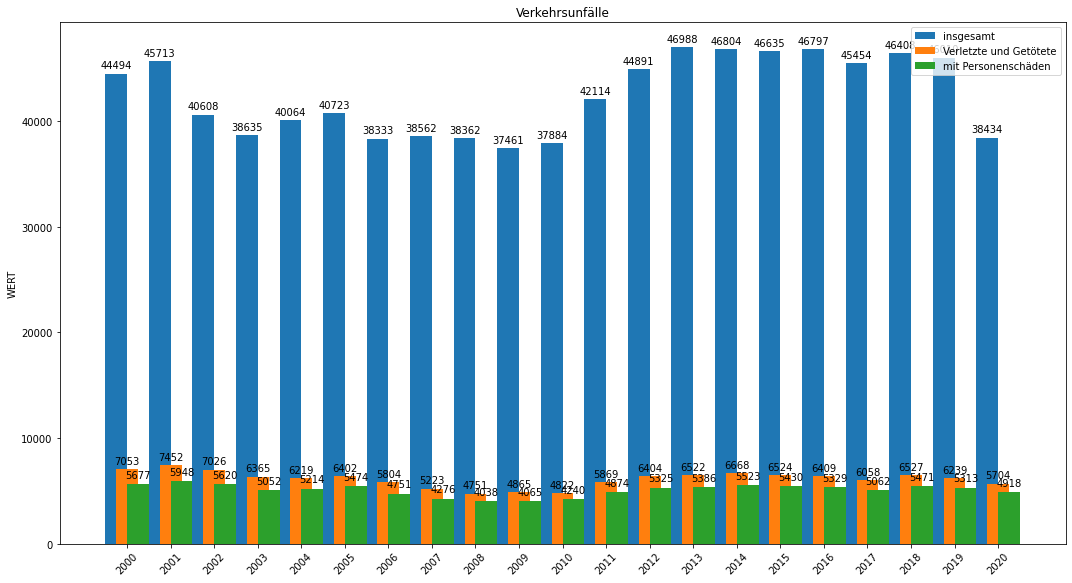

In [18]:
make_plot(df, "Verkehrsunfälle")

## Drop 'Summe' for prediction task

In [20]:
for x in df.index:
  if df.loc[x, "MONAT"] == "Summe":
    df.drop(x, inplace = True)

In [21]:
df.shape

(1764, 5)

## Change the value of 'MONAT' from year+month to only the month

In [22]:
def get_month(x):
    return x[4:6]

In [23]:
df['MONAT']=df['MONAT'].apply(lambda x: get_month(str(x)))

In [25]:
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
2085,Verkehrsunfälle,Verletzte und Getötete,2000,12,515.0
1778,Verkehrsunfälle,mit Personenschäden,2000,03,414.0
1777,Verkehrsunfälle,mit Personenschäden,2000,02,329.0
1776,Verkehrsunfälle,mit Personenschäden,2000,01,321.0
1489,Verkehrsunfälle,insgesamt,2000,12,3789.0


### Save the cleaned dataset

In [26]:
df.to_csv('dataset_cleaned.csv')